In [5]:
import time 
import sys
from blu import *  
# True parameters
data=np.load(data_dir+'/catalog/m1m2zxeff_posterior_138_lensed.npz')
m1,m2,redshift,xeff = data['m1'],data['m2'],data['redshift'], data['xeff'] 
del data
# posterior samples 
with open('./posterior/img1_det_m1m2xeff.pkl', 'rb') as f:
    img1=dill.load(f)
with open('./posterior/img2_det_m1m2xeff.pkl', 'rb') as f:
    img2=dill.load(f)
# population models 

# uniform distribution
with open('./pop_prior/uniform_pop_m1m2xeff.pkl', 'rb') as f:
    pop_uni=dill.load(f)
with open('./pop_prior/astro_m1m2chieff.pkl', 'rb') as f:
    pop_model=dill.load(f)

pop_true = mix_pop('./pop_prior/real_dist.pkl')
pop_power = mix_pop('./pop_prior/PL_pdf.pkl',wide=True)
N = 2e4
OLU = OddsRatio(gw_pop=pop_model,Nmc=N)
OLU_true = OddsRatio(gw_pop=pop_true,Nmc=N)
OLU_pl = OddsRatio(gw_pop=pop_power,Nmc=N)
OLU_uni = OddsRatio(gw_pop=pop_uni,Nmc=N)
#OLU_obs = OddsRatio(gw_pop=pop_obs,Nmc=N)

load_data = True 
if load_data:
    data = np.load('blu_data.npz')
    blu_true = data['bt']
    blu_hdpgmm = data['bh']
    blu_pl = data['bp']
    blu_uni = data['bu']

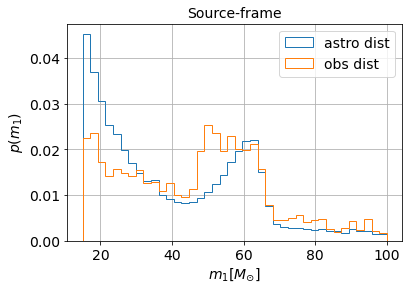

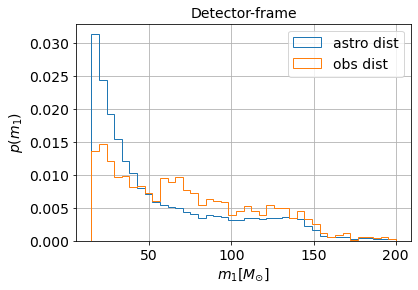

In [28]:
import time 
import sys
from blu import *
import matplotlib.pyplot as plt 
data=np.load(data_dir+'/catalog/PowerlawplusPeakplusDelta30000Samples.npz')
m1,m2,redshift = data['m1'],data['m2'],data['redshift']
plt.hist(m1,bins=40,range=(15,100),density=True,histtype='step',label='astro dist')

data=np.load(data_dir+'/catalog/Catalog_30000Samples_afterSelection.npz')
m1,m2,redshift = data['m1'],data['m2'],data['redshift']


plt.hist(m1,bins=40,range=(15,100),density=True,histtype='step',label='obs dist')
plt.title('Source-frame',fontsize=14)
plt.ylabel(r'$p(m_1)$',fontsize=14)
plt.xlabel(r'$m_1 [M_{\odot}]$',fontsize=14)
plt.grid(True)
plt.legend(fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.savefig('marginal_m1_src.png',bbox_inches = 'tight')
plt.show()
import time 
import sys
from blu import *
import matplotlib.pyplot as plt 
data=np.load(data_dir+'/catalog/PowerlawplusPeakplusDelta30000Samples.npz')
m1,m2,redshift = data['m1'],data['m2'],data['redshift']
plt.hist(m1*(1+redshift),bins=40,range=(15,200),density=True,histtype='step',label='astro dist')

data=np.load(data_dir+'/catalog/Catalog_30000Samples_afterSelection.npz')
m1,m2,redshift = data['m1'],data['m2'],data['redshift']


plt.hist(m1*(1+redshift),bins=40,range=(15,200),density=True,histtype='step',label='obs dist')
plt.title('Detector-frame',fontsize=14)
plt.ylabel(r'$p(m_1)$',fontsize=14)
plt.xlabel(r'$m_1 [M_{\odot}]$',fontsize=14)
plt.grid(True)
plt.legend(fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.savefig('marginal_m1_src.png',bbox_inches = 'tight')

In [13]:
bt = []
bh = []
for Nmc in [1e5,1e6,5e6]:
    print(Nmc)
    t0=time.time()
    OLU_true = OddsRatio(gw_pop=pop_true,Nmc=Nmc)
    OLU = OddsRatio(gw_pop=pop_model,Nmc=N)
    bt.append(OLU_true.BayesFactor_PEuniform(img1[1],img2[1]))
    bh.append(OLU.BayesFactor_PEuniform(img1[1],img2[1]))
    print(time.time()-t0)
#blu_true = np.array(blu_true)
#blu_hdpgmm = np.array(blu_hdpgmm)

#blu_true = log_blu(blu_true)
#blu_hdpgmm = log_blu(blu_hdpgmm)


100000.0
16.954535961151123
1000000.0
18.69574499130249
5000000.0
24.118141889572144


In [6]:
m1z = m1z=m1*(1+redshift)
m1z = m1z[:int(m1z.size/2)]
index = np.where(m1z<90)[0]

In [7]:
blu_uni=[]
blu_true=[]
blu_hdpgmm=[]
blu_pl=[]
#blu_obs=[]

for i in tqdm(index, total = int(index.size), desc = 'BLU-lensed pair'):
    blu_true.append(OLU_true.BayesFactor_PEuniform(img1[i],img2[i]))
    blu_hdpgmm.append(OLU.BayesFactor_PEuniform(img1[i],img2[i]))
    blu_pl.append(OLU_pl.BayesFactor_PEuniform(img1[i],img2[i]))
    blu_uni.append(OLU_uni.BayesFactor_PEuniform(img1[i],img2[i]))
#    blu_obs.append(OLU_obs.BayesFactor_PEuniform(img1[i],img2[i]))

blu_true = np.array(blu_true)
blu_hdpgmm = np.array(blu_hdpgmm)
blu_pl = np.array(blu_pl)
blu_uni = np.array(blu_uni)
#blu_obs = np.array(blu_obs)

blu_true = log_blu(blu_true)
blu_hdpgmm = log_blu(blu_hdpgmm)
blu_pl = log_blu(blu_pl)
blu_uni = log_blu(blu_uni)
#blu_obs = log_blu(blu_obs)


-th pair:   4%|███▌                                                                                     | 1/25 [00:19<07:52, 19.68s/it]

19.679938077926636


-th pair: 100%|████████████████████████████████████████████████████████████████████████████████████████| 25/25 [08:36<00:00, 20.66s/it]


In [14]:
np.savez('blu_data.npz',bt=blu_true, bh=blu_hdpgmm, bp=blu_pl , bu=blu_uni)

Astro Dists: 100%|█████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:32<00:00, 10.78it/s]


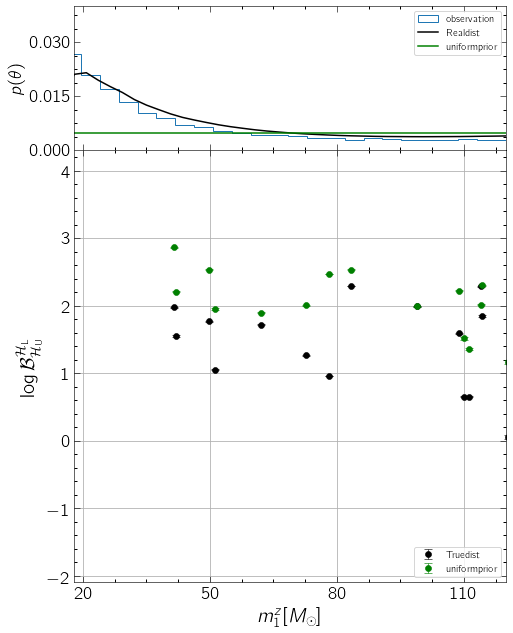

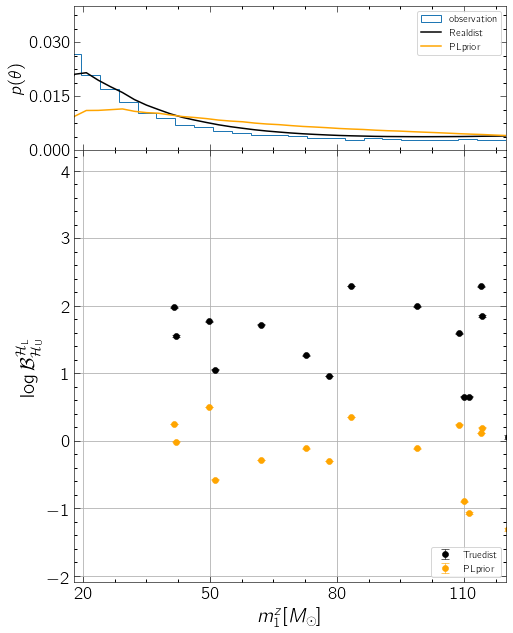

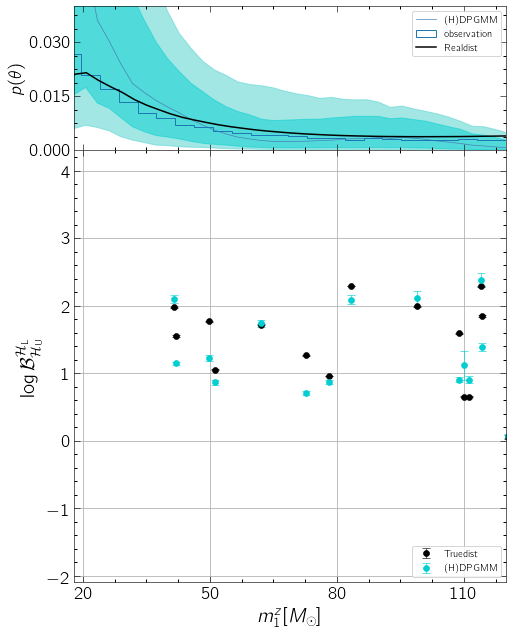

In [8]:
from marginal_plt import *
%matplotlib inline
xlim=(18,120)
ylim=(-2.1,4.3)
n = blu_true.shape[0]
plotting_two(blu_true[:n], blu_uni[:n],pop_model,
             pop_true,pop_power, m1z[:n],math_blu,
             real_dist=True,uni_dist=True,xlim=xlim,ylim=ylim)
plt.savefig('blu_uni.pdf',bbox_inches = 'tight')
#ylim=(0,3.1)
plotting_two(blu_true[:n], blu_pl[:n],pop_model,
             pop_true,pop_power, m1z[:n],math_blu,
             real_dist=True,PL_dist=True,xlim=xlim,ylim=ylim)
plt.savefig('blu_pl.pdf',bbox_inches = 'tight')
#ylim=(0.5,2.26)
#ylim=(0,5.1)
plotting_two(blu_true[:n], blu_hdpgmm[:n],pop_model,
             pop_true,pop_true, m1z[:n],math_blu,
             real_dist=True,HDPGMM_model=True,xlim=xlim,ylim=ylim)
plt.savefig('blu_dpgmm.pdf',bbox_inches = 'tight')